# Cargar datos EOS

In [16]:
# descargar los datos
!wget 'https://drive.google.com/uc?export=download&id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH' -O 'sly4.dat'

--2025-09-08 21:44:12--  https://drive.google.com/uc?export=download&id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH
Resolving drive.google.com (drive.google.com)... 142.251.107.113, 142.251.107.138, 142.251.107.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH&export=download [following]
--2025-09-08 21:44:12--  https://drive.usercontent.google.com/download?id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.196.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6040 (5.9K) [application/octet-stream]
Saving to: ‘sly4.dat’

sly4.dat            100%[===================>]   5.90K  --.-KB/s    i

In [17]:
import numpy as np
import pandas as pd

In [18]:
data_numpy = np.genfromtxt('./sly4.dat', skip_header=6, usecols=[1,2,3]) # las seis primeras filas las ignoramos, usamos las columnas '2' y '3'
data_numpy

array([[2.720e-14, 4.510e+01, 1.700e+14],
       [1.270e-13, 2.120e+02, 5.820e+15],
       [6.930e-13, 1.150e+03, 1.900e+17],
       [6.295e-12, 1.044e+04, 9.744e+18],
       [1.581e-11, 2.622e+04, 4.968e+19],
       [3.972e-11, 6.587e+04, 2.431e+20],
       [9.976e-11, 1.654e+05, 1.151e+21],
       [2.506e-10, 4.156e+05, 5.266e+21],
       [6.294e-10, 1.044e+06, 2.318e+22],
       [1.581e-09, 2.622e+06, 9.755e+22],
       [3.972e-09, 6.588e+06, 3.911e+23],
       [5.000e-09, 8.293e+06, 5.259e+23],
       [9.976e-09, 1.655e+07, 1.435e+24],
       [1.990e-08, 3.302e+07, 3.833e+24],
       [3.973e-08, 6.592e+07, 1.006e+25],
       [7.926e-08, 1.315e+08, 2.604e+25],
       [1.581e-07, 2.625e+08, 6.676e+25],
       [1.991e-07, 3.305e+08, 8.738e+25],
       [3.156e-07, 5.239e+08, 1.629e+26],
       [5.001e-07, 8.303e+08, 3.029e+26],
       [6.296e-07, 1.046e+09, 4.129e+26],
       [9.667e-07, 1.606e+09, 6.860e+26],
       [1.532e-06, 2.545e+09, 1.272e+27],
       [2.507e-06, 4.166e+09, 2.35

In [ ]:
cols = ['index', 'n_B[fm^{-3}]', 'rho[g/cm^3]','P[dyn/cm^2]'] # nombres de las columnas
data_pandas = pd.read_csv('sly4.dat', sep='\\s+', skiprows=6, names=cols, usecols=[1,2,3])
data_pandas.head()

,n_B[fm^{-3}],rho[g/cm^3],P[dyn/cm^2]
0,2.720000e-14,45.1,1.700000e+14
1,1.270000e-13,212.0,5.820000e+15
2,6.930000e-13,1150.0,1.900000e+17
3,6.295000e-12,10440.0,9.744000e+18
4,1.581000e-11,26220.0,4.968000e+19


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

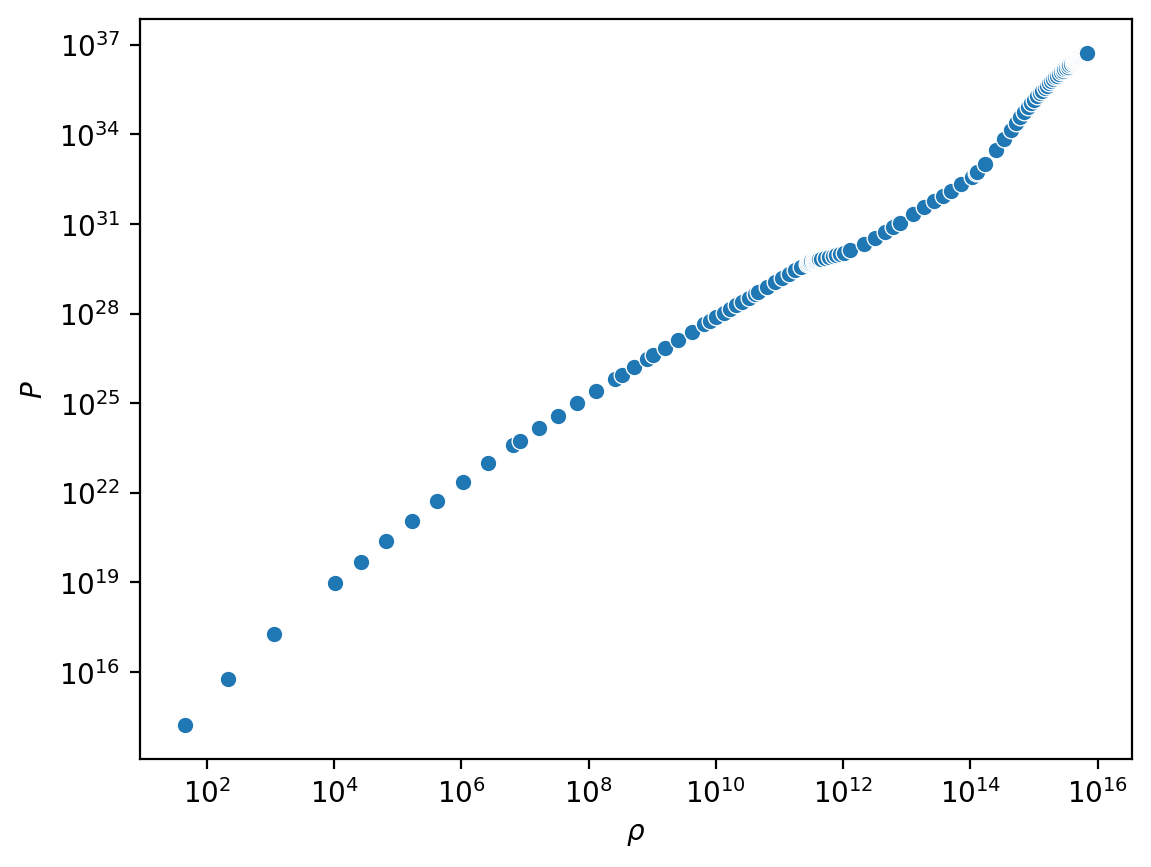

In [23]:
g = sns.scatterplot(data=data_pandas, x='rho[g/cm^3]', y='P[dyn/cm^2]')
g.set_xlabel(r'$\rho$')
g.set_ylabel(r'$P$')
g.set_xscale('log')
g.set_yscale('log')

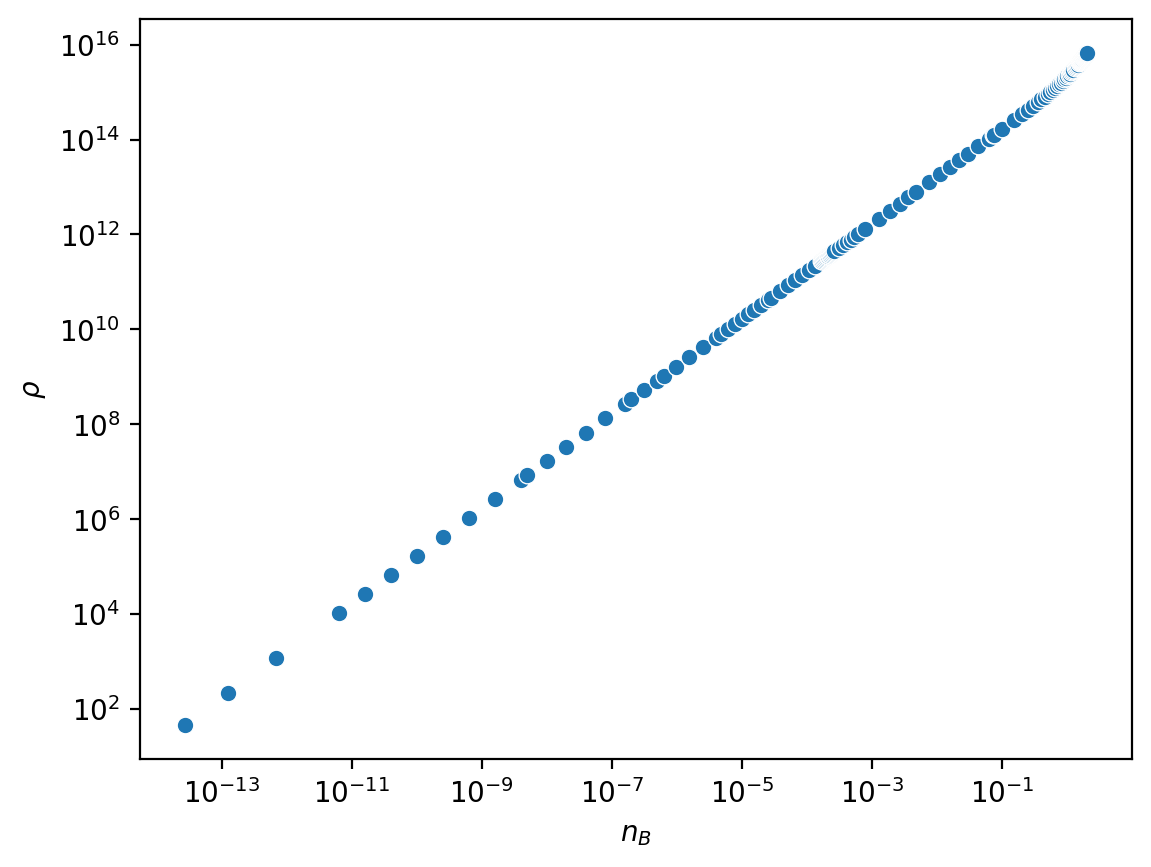

In [24]:
g = sns.scatterplot(data=data_pandas, x='n_B[fm^{-3}]', y='rho[g/cm^3]')
g.set_xlabel(r'$n_B$')
g.set_ylabel(r'$\rho$')
g.set_xscale('log')
g.set_yscale('log')

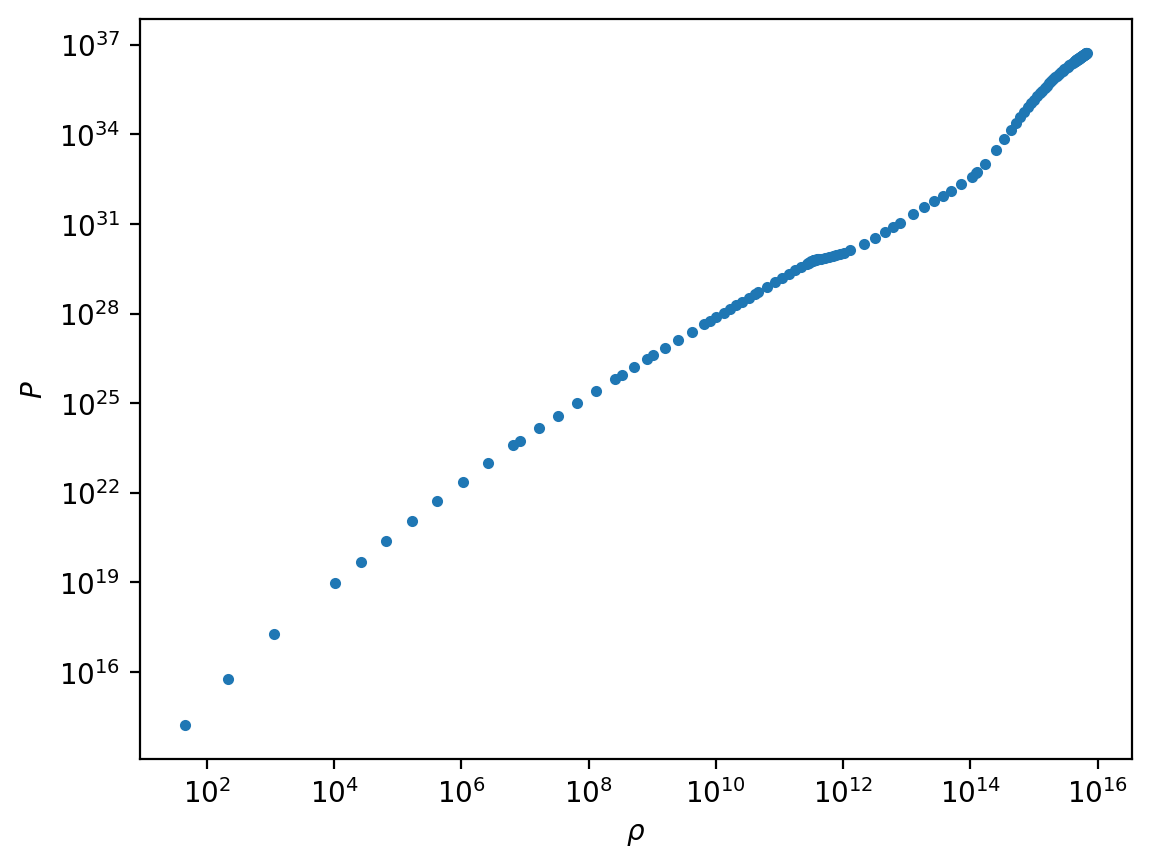

In [25]:
fig, ax = plt.subplots() # objetos
ax.plot(data_pandas['rho[g/cm^3]'], data_pandas['P[dyn/cm^2]'], '.')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$P$')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [32]:
rho = data_numpy[:,1]
idx  = np.where((rho>=1e6)&(rho<=1e8))
rho[idx]

array([ 1044000.,  2622000.,  6588000.,  8293000., 16550000., 33020000.,
       65920000.])

In [31]:
(rho>1e6)*rho

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.044e+06, 2.622e+06, 6.588e+06, 8.293e+06,
       1.655e+07, 3.302e+07, 6.592e+07, 1.315e+08, 2.625e+08, 3.305e+08,
       5.239e+08, 8.303e+08, 1.046e+09, 1.606e+09, 2.545e+09, 4.166e+09,
       6.606e+09, 8.031e+09, 1.011e+10, 1.319e+10, 1.661e+10, 2.091e+10,
       2.533e+10, 3.315e+10, 4.174e+10, 4.652e+10, 6.347e+10, 8.444e+10,
       1.100e+11, 1.408e+11, 1.774e+11, 2.207e+11, 2.714e+11, 2.825e+11,
       2.940e+11, 3.058e+11, 3.180e+11, 3.305e+11, 3.434e+11, 3.476e+11,
       3.481e+11, 3.495e+11, 3.612e+11, 3.730e+11, 3.865e+11, 4.016e+11,
       4.180e+11, 4.420e+11, 5.108e+11, 5.912e+11, 6.822e+11, 7.834e+11,
       8.943e+11, 1.015e+12, 1.283e+12, 2.114e+12, 3.177e+12, 4.483e+12,
       6.051e+12, 7.906e+12, 1.259e+13, 1.882e+13, 2.692e+13, 3.717e+13,
       4.968e+13, 7.202e+13, 1.051e+14, 1.237e+14, 1.284e+14, 1.694e+14,
       2.550e+14, 3.417e+14, 4.298e+14, 5.198e+14, 

In [34]:
rho_max = np.max(rho)
print(rho_max)
np.where(rho==rho_max)

6749000000000000.0


(array([151]),)

In [35]:
np.argmax(rho)

np.int64(151)